In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist

In [3]:
def read_data():
    data = pd.read_csv('datasets/the_trang_kmeans.csv')
    X = data[['ChieuCao', 'CanNang']].values
    return X

In [4]:
def draw_x(x, y):
    plt.scatter(x, y)

In [5]:
def draw_Xy(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y)

In [6]:
def draw_points(points, shape='rx'):
    plt.plot(points[:, 0], points[:, 1], shape)

In [7]:
def draw_show():
    plt.title('Thể trạng Kmeans')
    plt.xlabel('Chiều cao')
    plt.ylabel('Cân nặng')
    plt.show()

In [8]:
X = read_data()
k = 3

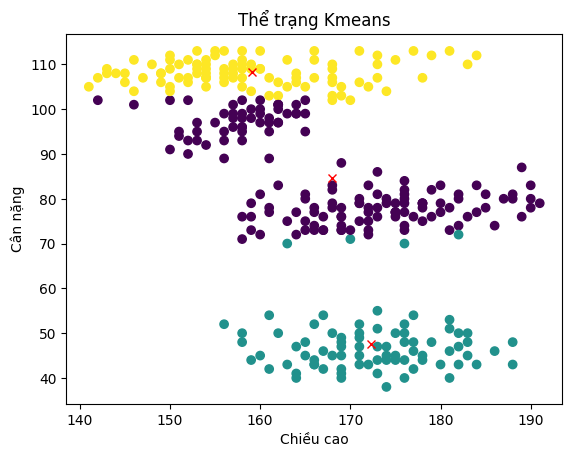

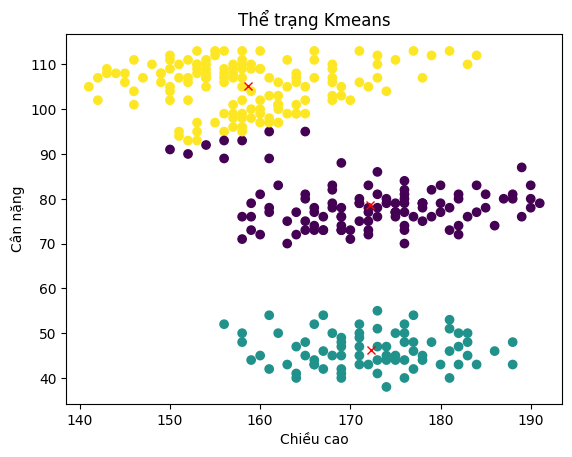

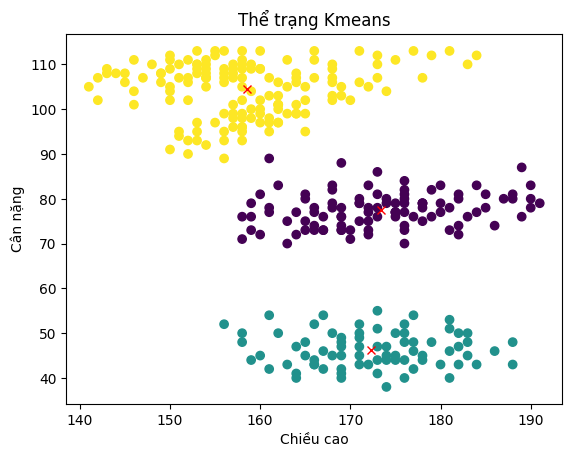

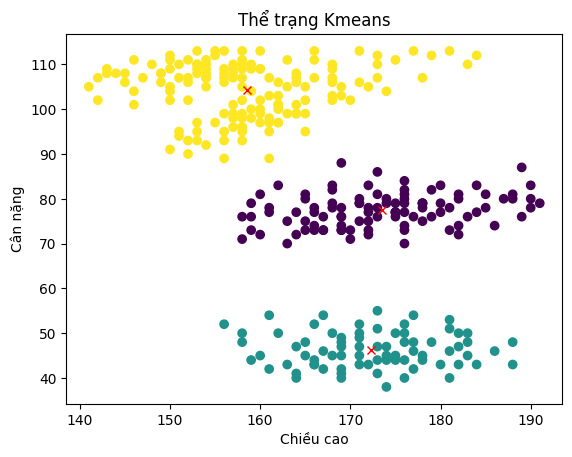

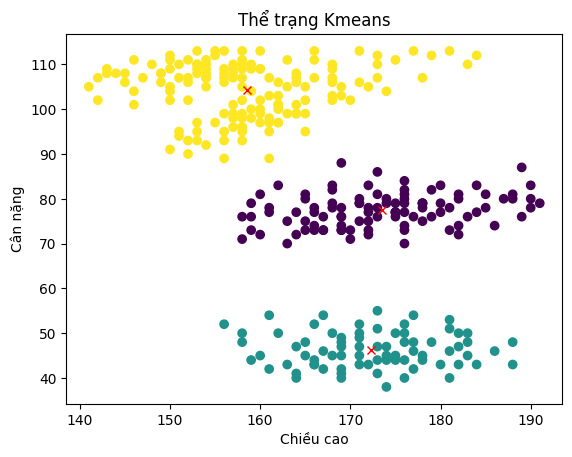

[[173.5         77.48      ]
 [172.31578947  46.27631579]
 [158.56756757 104.35810811]]


In [9]:
centers = X[np.random.choice(X.shape[0], k)]
while True:
    labels = np.argmin(cdist(X, centers), axis=1)
    before_centers = centers
    centers = []
    for i in range(k):
        centers.append(np.mean(X[labels == i], axis=0))
    centers = np.array(centers)
    draw_Xy(X=X, y=labels)
    draw_points(points=centers)
    draw_show()
    if set([tuple(c) for c in before_centers]) == set([tuple(c) for c in centers]):
        break
print(centers)

Sử dụng scikit-learn

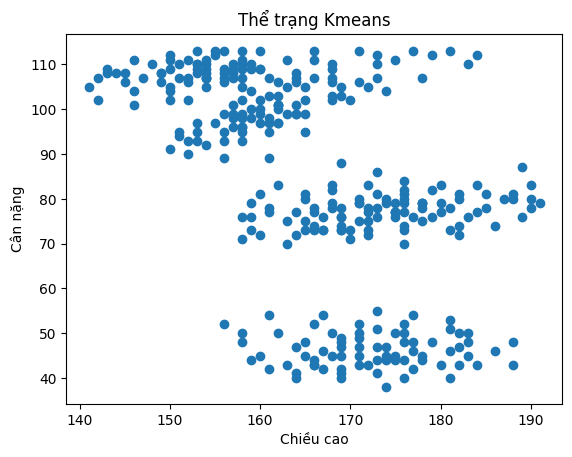

In [10]:
from sklearn.cluster import KMeans

X = pd.read_csv('datasets/the_trang_kmeans.csv').values
k = 3
draw_x(x=X[:, 0], y=X[:, 1])
draw_show()

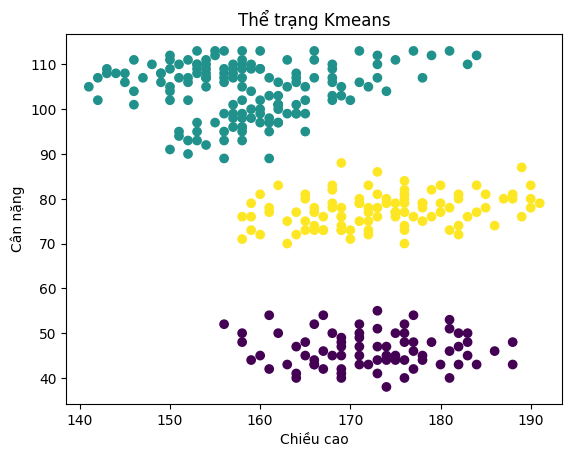

In [11]:
model = KMeans(n_clusters=k)
model.fit(X)
labels = model.predict(X)

draw_Xy(X=X, y=labels)
draw_show()

In [13]:
x_predict = model.predict(np.array([[185, 55]]))
x_predict

array([0], dtype=int32)